In [1]:
source("../BrusselSprouts/scripts/functions.R")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(readxl)

In [3]:
my_crosses=read_xlsx("~/data/trd/Crosses.xlsx", sheet=2)[,c("Short name 1", "Short name 2")]
my_crosses

Short name 1,Short name 2
<chr>,<chr>
BAK,BET
BAN,BTI
AKH,BQC
ABS,BEF
BAK,BMK
BAN,CRB
AMM,BKL
ABE,ABL
BFC,CCF


In [4]:
chris_crosses=data.frame(sample1=c("ACP","BAP","CCD","ATE","ACK","AKE","BAH","ANG"),
                        sample2=c("BFP","CMP","CPG","YCR","ACV","BAH","CGD","CEI"))

In [5]:
SV_filter=readLines("~/data/TRD/long_read_Andreas/goodStrains.list")
Matrix_filter=readLines("~/data/TRD/SamplesInMatrix.list")
polyploidy_filter=readLines("~/data/TRD/AD/notPolyploid.list")
distance_filter=fread("~/data/TRD/distant_comparisons.csv", data.table=FALSE)
asd2d_data=fread("~/data/TRD/asd_2d.csv", data.table=FALSE)

In [6]:
#SACE prefixed IDs are not in Matrix
summary(str_replace(polyploidy_filter[startsWith(polyploidy_filter, "SACE")],fixed("SACE_"),"") %in% Matrix_filter)
summary(polyploidy_filter[startsWith(polyploidy_filter, "SACE")] %in% Matrix_filter)

   Mode   FALSE 
logical      87 

   Mode   FALSE 
logical      87 

In [7]:
library(readxl)
Ecology=read_xlsx("/home/jnrunge/1002_strains_total_dataset.xlsx", sheet = "final_1002_site")
head(Ecology)

Standard ID,Strain Name,Ecological origin,Geographical Origin
<chr>,<chr>,<chr>,<chr>
CRI,AGME 5I,Wine,Italy
CEN,ATCC 38618:2-2,Concentrated orange juice,NA
CEP,ATCC 52922-1C,Tapuy (rice wine),Philippines
CDB,ATCC 66348-1D,Soil,Japan
ANN,AY529516,Soil beneath Quercus velutina,Ghana
BMF,269521J,Human,"RVI Newcastle, UK"


In [8]:
library(VennDiagram)
display_venn <- function(x, ...){
  library(VennDiagram)
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}

Loading required package: grid

Loading required package: futile.logger



In [9]:
summary(unique(c(distance_filter$row,distance_filter$col))%in%SV_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%Matrix_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%polyploidy_filter)

   Mode   FALSE    TRUE 
logical     998      13 

   Mode   FALSE    TRUE 
logical     953      58 

   Mode   FALSE    TRUE 
logical     160     851 

In [10]:
all_comparisons=fread("~/data/TRD/comparisons.csv")
ac_OG=all_comparisons
all_comparisons=subset(all_comparisons, 
                       row%in%Matrix_filter & row%in%polyploidy_filter & 
                      #col%in%SV_filter & row %in% SV_filter &
                       col%in%Matrix_filter & col%in%polyploidy_filter & dist!=0)

In [11]:
summary(all_comparisons$dist)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000081 0.027512 0.035955 0.032908 0.043575 0.053588 

In [12]:
all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("row"="Standard ID"))
                          all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("col"="Standard ID"))
all_comparisons

row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
AAR,AAM,0.025973,Beer,Ireland,Bakery,France
AAS,AAM,0.031082,AIDS patient,USA,Bakery,France
AAV,AAM,0.032335,Blood,"California, USA",Bakery,France
ABA,AAM,0.033094,"Human, clinical","California, USA",Bakery,France
ABC,AAM,0.034739,Ascites fluid,USA,Bakery,France
ABE,AAM,0.022300,"Human, clinical",Europe,Bakery,France
ABG,AAM,0.031679,"Human, clinical",NA,Bakery,France
ABK,AAM,0.031216,"Human, clinical",NA,Bakery,France
ABL,AAM,0.042699,Soil,South Africa,Bakery,France


In [13]:
all_comparisons=subset(all_comparisons, dist>0.02)
all_comparisons$dup=NA
for(i in 1:nrow(all_comparisons)){
    all_comparisons$dup[i]=which(paste(all_comparisons$col,all_comparisons$row) == paste(all_comparisons$row[i],all_comparisons$col[i]))
}
all_comparisons$nrow=1:nrow(all_comparisons)
all_comparisons=all_comparisons[all_comparisons$dup < all_comparisons$nrow,]
nrow(all_comparisons)

[1] 1374

In [14]:
IDs=unique(c(all_comparisons$row,all_comparisons$col))
length(IDs)

[1] 58

In [15]:
head(all_comparisons)

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
58,AAM,AAR,0.025973,Bakery,France,Beer,Ireland,1,58
115,AAM,AAS,0.031082,Bakery,France,AIDS patient,USA,2,97
116,AAR,AAS,0.029481,Beer,Ireland,AIDS patient,USA,59,98
172,AAM,AAV,0.032335,Bakery,France,Blood,"California, USA",3,154
173,AAR,AAV,0.030756,Beer,Ireland,Blood,"California, USA",60,155
174,AAS,AAV,0.026691,AIDS patient,USA,Blood,"California, USA",99,156


In [16]:
all_comparisons=subset(all_comparisons,
                      !(paste(row,col) %in% paste(chris_crosses$sample1,
                  chris_crosses$sample2)) & 
                      !(paste(col,row) %in% paste(chris_crosses$sample1,
                  chris_crosses$sample2)) & 
                      !(paste(row,col) %in% paste(my_crosses$`Short name 1`,
                                                     my_crosses$`Short name 2`)) & 
                      !(paste(col,row) %in% paste(my_crosses$`Short name 1`,
                                                     my_crosses$`Short name 2`)))

In [17]:
already_crossed=data.frame(s1=c(chris_crosses$sample1,my_crosses$`Short name 1`), 
                           s2=c(chris_crosses$sample2,my_crosses$`Short name 2`),stringsAsFactors=FALSE)
already_crossed

s1,s2
<chr>,<chr>
ACP,BFP
BAP,CMP
CCD,CPG
ATE,YCR
ACK,ACV
AKE,BAH
BAH,CGD
ANG,CEI
BAK,BET


In [18]:
already_crossed_strains=unique(c(already_crossed$s1,already_crossed$s2))

if a strain has already been crossed, find for each proposed cross the cross where the other sample is least similar to those that were already crossed AND crossed least often

In [19]:
ac_OG$row=str_replace(ac_OG$row,"SACE_","")
ac_OG$col=str_replace(ac_OG$col,"SACE_","")

In [20]:
ac_OG$paste1=paste(ac_OG$row,ac_OG$col)
ac_OG$paste2=paste(ac_OG$col,ac_OG$row)

In [21]:
getDist=function(x){
    return(ac_OG$dist[ac_OG$paste1==x|
                     ac_OG$paste2==x][1])
}

In [22]:
getDist("ATE BEV")

[1] 0.033209

In [23]:
x="BAK"

In [24]:
not_these=""
print(x) # strain already crossed
    y=c(all_comparisons$row[all_comparisons$row==x | all_comparisons$col==x],
      all_comparisons$col[all_comparisons$row==x | all_comparisons$col==x])
    y=unique(y[y!=x]) # proposed crosses passing filters
    z=c(already_crossed$s1[already_crossed$s1==x | already_crossed$s2==x],
      already_crossed$s2[already_crossed$s1==x | already_crossed$s2==x])
    z=unique(z[z!=x]) # already crossed with these before
    if(not_these != ""){
        z=c(z, not_these)
    }

    if(length(y)==0){
        return(NA)
    }

x
y
z

[1] "BAK"


[1] "BAK"

[1] "AAM" "AAR" "AAS" "AAV" "ABA" "ABC" "ABE" "ABG" "ABK" "ABL" "ABP" "ABS"
[13] "ACI" "ACK" "ACN" "ACP" "ACT" "AKE" "AKH" "AKI" "AKQ" "AKS" "AKV" "AMD"
[25] "AMM" "AND" "ANG" "ANH" "ANI" "ATE" "AVI" "BAN" "BAP" "BBQ" "BBS" "BEF"
[37] "BEV" "BFC" "BFD" "BFP" "BFQ" "BFR" "BHN" "BID" "BKL" "BQC" "BTI" "CCC"
[49] "CCD" "CCF" "CCG" "CMP" "CMQ" "CPG" "CRB"

[1] "BET" "BMK"

In [25]:
getNextBestCross=function(x, not_these=""){
    print(x) # strain already crossed
    y=c(all_comparisons$row[all_comparisons$row==x | all_comparisons$col==x],
      all_comparisons$col[all_comparisons$row==x | all_comparisons$col==x])
    y=unique(y[y!=x]) # proposed crosses passing filters
    z=c(already_crossed$s1[already_crossed$s1==x | already_crossed$s2==x],
      already_crossed$s2[already_crossed$s1==x | already_crossed$s2==x])
    z=unique(z[z!=x]) # already crossed with these before
    if(not_these[1] != ""){
        z=c(z, not_these)
    }

    if(length(y)==0){
        return(NA)
    }

    yz_df=expand.grid(y=y, z=z, dist=NA, stringsAsFactors = FALSE)
yz_df$dist=unlist(lapply(paste(yz_df$y,yz_df$z), getDist))
    yz_df

    yz_df_sum=summarise(group_by(yz_df, y), sum(dist))
    yz_df_sum=yz_df_sum[order(yz_df_sum$`sum(dist)`,decreasing = TRUE),]
return(yz_df_sum$y[1])
    }
NextBestCrosses=unlist(lapply(already_crossed_strains, getNextBestCross))
NextBestCrosses

[1] "ACP"
[1] "BAP"
[1] "CCD"
[1] "ATE"
[1] "ACK"
[1] "AKE"
[1] "BAH"
[1] "ANG"
[1] "BAK"
[1] "BAN"
[1] "AKH"
[1] "ABS"
[1] "AMM"
[1] "ABE"
[1] "BFC"
[1] "BID"
[1] "ACT"
[1] "AKV"
[1] "AMD"
[1] "ANI"
[1] "AND"
[1] "ANH"
[1] "AVI"
[1] "ACI"
[1] "ABC"
[1] "ACN"
[1] "AAM"
[1] "ABG"
[1] "AAR"
[1] "BFP"
[1] "CMP"
[1] "CPG"
[1] "YCR"
[1] "ACV"
[1] "CGD"
[1] "CEI"
[1] "BET"
[1] "BTI"
[1] "BQC"
[1] "BEF"
[1] "BMK"
[1] "CRB"
[1] "BKL"
[1] "ABL"
[1] "CCF"
[1] "CCC"
[1] "CCG"
[1] "CMQ"
[1] "BFQ"
[1] "BFR"
[1] "BHN"
[1] "BFD"
[1] "AKI"
[1] "ABP"
[1] "AKS"
[1] "AKQ"
[1] "ABA"


[1] "AKH" "CPG" "AKH" "CPG" "AKH" "CPG" NA    "AKH" "AKH" "AKH" "BEF" "BAK"
[13] "AKH" "ACN" "ACN" "ACN" "ACN" "ACN" "AKH" "AKH" "AKH" "AKH" "AKH" "BAK"
[25] "AKH" "BAK" "BAK" "AKH" "BAK" "AKH" "CPG" "AAR" NA    NA    NA    NA   
[37] "ACN" "AKH" "AAM" "AKH" "ATE" "AAM" "ACN" "AKH" "AKH" "AKH" "AKH" "AKH"
[49] "ACN" "ACN" "ACN" "ACN" "BAK" "BAK" "AKH" "BAK" "AKH"

In [26]:
reverseOrder=function(x)#find duplicates in the proposed crosses (to find a different cross to do)
    {
    x=strsplit(x, " ", fixed=TRUE)[[1]]
    return(paste(x[2],x[1], sep=" "))
}
duplicate_crosses=paste(already_crossed_strains,NextBestCrosses)[paste(already_crossed_strains,NextBestCrosses)%in%unlist(lapply(paste(already_crossed_strains,NextBestCrosses),reverseOrder))]
chooseSameOrder=function(x){
    x=strsplit(x, " ", fixed=TRUE)[[1]]
    x=sort(x)
    return(paste0(x, collapse=" "))
}
duplicate_crosses
duplicate_crosses=unique(unlist(lapply(duplicate_crosses, chooseSameOrder)))
duplicate_crosses

[1] "AKH BEF" "BEF AKH"

[1] "AKH BEF"

In [27]:
for(dc in duplicate_crosses){
    pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
    find_new_cross_for=strsplit(dc, split=" ",fixed=TRUE)[[1]][chosen<-rbinom(1,1,0.5)+1]
    #print(find_new_cross_for) already in the function
    if(find_new_cross_for %in% already_crossed_strains){
        pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
        pastedNextCrosses=pastedNextCrosses[grepl(find_new_cross_for,pastedNextCrosses)]
        pastedNextCrosses=str_replace(pastedNextCrosses, find_new_cross_for, "")
        pastedNextCrosses=str_replace(pastedNextCrosses, " ", "")
        pos=which(already_crossed_strains == find_new_cross_for)
        #already_crossed_strains=already_crossed_strains[-pos]
        NextBestCrosses[pos]=getNextBestCross(find_new_cross_for, 
                                              strsplit(dc, split=" ",fixed=TRUE)[[1]][c(1,2)[c(1,2) != chosen]])
        print(NextBestCrosses[pos])
    }else{
        stop("problem!")
    }
}


[1] "AKH"
[1] "BAK"


In [28]:
pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
pastedNextCrosses

[1] "ACP AKH" "BAP CPG" "CCD AKH" "ATE CPG" "ACK AKH" "AKE CPG" "BAH NA" 
 [8] "ANG AKH" "BAK AKH" "BAN AKH" "AKH BAK" "ABS BAK" "AMM AKH" "ABE ACN"
[15] "BFC ACN" "BID ACN" "ACT ACN" "AKV ACN" "AMD AKH" "ANI AKH" "AND AKH"
[22] "ANH AKH" "AVI AKH" "ACI BAK" "ABC AKH" "ACN BAK" "AAM BAK" "ABG AKH"
[29] "AAR BAK" "BFP AKH" "CMP CPG" "CPG AAR" "YCR NA"  "ACV NA"  "CGD NA" 
[36] "CEI NA"  "BET ACN" "BTI AKH" "BQC AAM" "BEF AKH" "BMK ATE" "CRB AAM"
[43] "BKL ACN" "ABL AKH" "CCF AKH" "CCC AKH" "CCG AKH" "CMQ AKH" "BFQ ACN"
[50] "BFR ACN" "BHN ACN" "BFD ACN" "AKI BAK" "ABP BAK" "AKS AKH" "AKQ BAK"
[57] "ABA AKH"

In [29]:
# some strains may be over-represented. we should find the lowest distance crosses and find alternatives
# this probably needs to be iterated a few times to equalize as much as possible?

tab=table(c(already_crossed_strains, NextBestCrosses))
tab=tab[order(tab, decreasing = TRUE)]
var(tab)

[1] 13.4386

In [30]:
tab


AKH ACN BAK CPG AAM AAR ATE ABA ABC ABE ABG ABL ABP ABS ACI ACK ACP ACT ACV AKE 
 25  12  10   5   3   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1 
AKI AKQ AKS AKV AMD AMM AND ANG ANH ANI AVI BAH BAN BAP BEF BET BFC BFD BFP BFQ 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
BFR BHN BID BKL BMK BQC BTI CCC CCD CCF CCG CEI CGD CMP CMQ CRB YCR 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 

In [50]:
count_bad_changes=0
startTime=Sys.time()
while(sum(tab>1)>0){
        t=sample(names(tab[tab>1]), 1, prob=tab[tab>1]/sum(tab[tab>1]))
        NextBestCrosses_bak=NextBestCrosses
        pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
        if(!(t %in% names(tab[tab>1]))){
            next
        }
        old_var=mean(tab)-median(tab)
        t_crosses=which(endsWith(pastedNextCrosses, t))
        if(length(t_crosses)==0){
            stop("issue!")
        }
        distance_prop=1/(order(unlist(lapply(pastedNextCrosses[t_crosses], getDist)))+1)
        random_cross=sample(1:length(pastedNextCrosses[t_crosses]),
                           1,
                           prob=distance_prop)
        dc=pastedNextCrosses[t_crosses][random_cross]
        pastedNextCrosses_bak=pastedNextCrosses
        pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
        find_new_cross_for=str_replace(dc, fixed(t), "")
        find_new_cross_for=str_replace(find_new_cross_for, fixed(" "), "")
        chosen=which(strsplit(dc, split=" ",fixed=TRUE)[[1]] != t)


        #print(find_new_cross_for) already in the function
        if(find_new_cross_for %in% already_crossed_strains){
            pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
            pastedNextCrosses=pastedNextCrosses[grepl(find_new_cross_for,pastedNextCrosses)]
            pastedNextCrosses=str_replace(pastedNextCrosses, find_new_cross_for, "")
            pastedNextCrosses=str_replace(pastedNextCrosses, " ", "")
            pos=which(already_crossed_strains == find_new_cross_for)
            #already_crossed_strains=already_crossed_strains[-pos]
            ignore_these=names(tab[tab>quantile(tab[tab>1], 0.75)])
            if(length(ignore_these)==0){
                ignore_these=""
            }
            nextC=getNextBestCross(find_new_cross_for, 
                                                  ignore_these)
            if(!is.na(nextC)){
                NextBestCrosses[pos]=nextC
            }
            print(NextBestCrosses[pos])
        }else{
            stop("problem!")
        }



        tab=table(c(already_crossed_strains, NextBestCrosses))
        tab=tab[order(tab, decreasing = TRUE)]
        print(mean(tab)-median(tab))

        if(mean(tab)-median(tab)>old_var){
            NextBestCrosses=NextBestCrosses_bak
            pastedNextCrosses=pastedNextCrosses_bak
            tab=table(c(already_crossed_strains, NextBestCrosses))
            tab=tab[order(tab, decreasing = TRUE)]
            print(mean(tab)-median(tab))
            count_bad_changes=count_bad_changes+1
          
        }
    


    if(count_bad_changes>=100 | as.numeric(difftime(Sys.time(), startTime, units="hours")) > 6){
        break
    }
}

In [53]:
tab


AKH ACN BAK CPG BEF AAM AAR BAN ABA ABC ABE ABG ABL ABP ABS ACI ACK ACP ACT ACV 
 14  13  13   9   4   3   2   2   1   1   1   1   1   1   1   1   1   1   1   1 
AKE AKI AKQ AKS AKV AMD AMM AND ANG ANH ANI ATE AVI BAH BAP BET BFC BFD BFP BFQ 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
BFR BHN BID BKL BMK BQC BTI CCC CCD CCF CCG CEI CGD CMP CMQ CRB YCR 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 

In [54]:
pastedNextCrosses=paste(already_crossed_strains,NextBestCrosses)
pastedNextCrosses

[1] "ACP BAK" "BAP CPG" "CCD AKH" "ATE CPG" "ACK BAK" "AKE CPG" "BAH NA" 
 [8] "ANG CPG" "BAK BEF" "BAN BAK" "AKH BEF" "ABS ACN" "AMM BEF" "ABE AKH"
[15] "BFC ACN" "BID ACN" "ACT ACN" "AKV ACN" "AMD BAK" "ANI AKH" "AND BAK"
[22] "ANH BAK" "AVI AKH" "ACI BAK" "ABC BAK" "ACN CPG" "AAM AKH" "ABG CPG"
[29] "AAR AKH" "BFP AKH" "CMP CPG" "CPG AAR" "YCR NA"  "ACV NA"  "CGD NA" 
[36] "CEI NA"  "BET ACN" "BTI AKH" "BQC AAM" "BEF AKH" "BMK ACN" "CRB AAM"
[43] "BKL ACN" "ABL AKH" "CCF BAK" "CCC BAK" "CCG AKH" "CMQ BAK" "BFQ ACN"
[50] "BFR ACN" "BHN ACN" "BFD ACN" "AKI CPG" "ABP BAK" "AKS AKH" "AKQ AKH"
[57] "ABA BAN"

Formerly done like this, but need to re-cross some, otherwise need to make new crossable strains
````r
IDs_dup<-unique(c(chris_crosses$sample1,
                  chris_crosses$sample2,
                  my_crosses$`Short name 1`,
                 my_crosses$`Short name 2`))[unique(c(chris_crosses$sample1,chris_crosses$sample2,
                                                     my_crosses$`Short name 1`,
                                                     my_crosses$`Short name 2`)) %in% IDs]

IDs=IDs[!(IDs%in%IDs_dup)]
IDs
````

````r 
x=list(a=SV_filter,b=Matrix_filter,c=polyploidy_filter,d=unique(c(all_comparisons$row,all_comparisons$col)),e=IDs)
options(repr.plot.width=3, repr.plot.height=3)
display_venn(x)
````

In [66]:
NextBestCrosses[!(NextBestCrosses %in% c(all_comparisons$row,all_comparisons$col))]
# only "NAs" cannot be found

[1] NA NA NA NA NA

In [67]:
all_comparisons=subset(all_comparisons, paste(col,row) %in% pastedNextCrosses | 
                      paste(row,col) %in% pastedNextCrosses)
all_comparisons=all_comparisons[order(all_comparisons$dist, decreasing=TRUE),]
all_comparisons

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
3210,AKE,CPG,0.053472,Palm wine,Nigeria,"Manzanilla-Alorena, olive","Aceituna, Spain",893,2690
3226,BAP,CPG,0.050857,Soil,"Wuzhi Mountain, Hainan province, China","Manzanilla-Alorena, olive","Aceituna, Spain",1758,2705
1033,ABE,AKH,0.050089,"Human, clinical",Europe,Palm wine,Nigeria,336,901
1028,AAR,AKH,0.048549,Beer,Ireland,Palm wine,Nigeria,70,896
3247,CMP,CPG,0.048397,Quercus sp.,"Pennsylvania, USA","Manzanilla-Alorena, olive","Aceituna, Spain",2624,2712
1783,ACP,BAK,0.047559,Wine,Russia,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",793,1606
1027,AAM,AKH,0.047275,Bakery,France,Palm wine,Nigeria,18,895
3219,ANG,CPG,0.047139,Soil beneath Quercusvelutina,"Pennsylvania, USA","Manzanilla-Alorena, olive","Aceituna, Spain",1374,2698
1778,ABP,BAK,0.047085,Prickly pear,Spain,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",553,1601


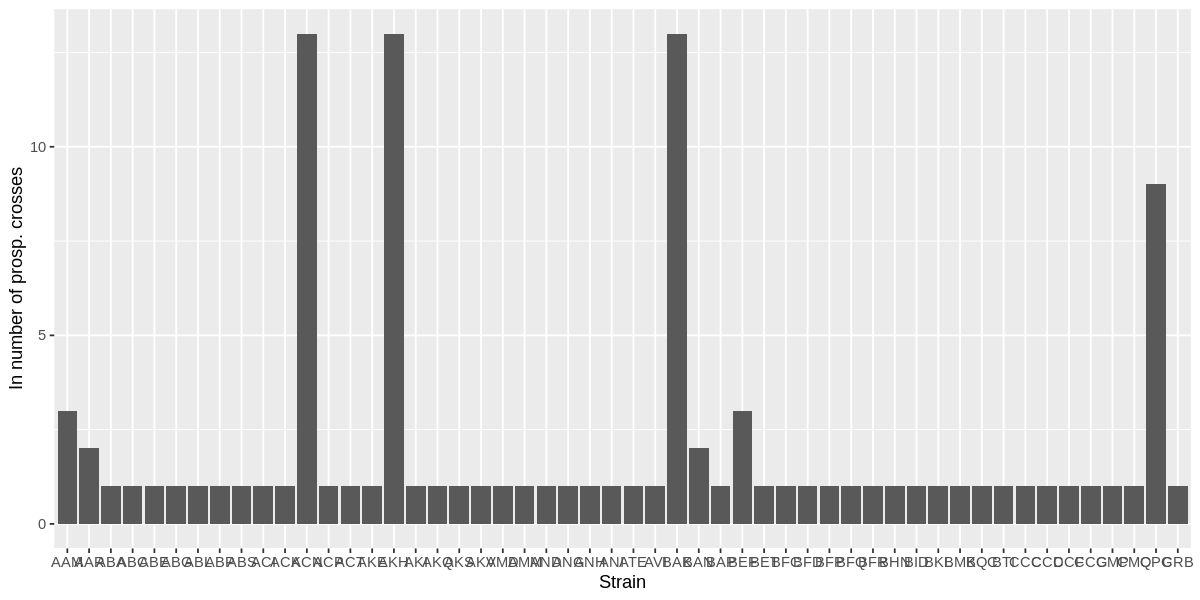

In [5]:
ggplot(mapping=aes(c(all_comparisons$row,all_comparisons$col)))+
geom_bar()+
xlab("Strain")+
ylab("In number of prosp. crosses")

In [69]:
all_comparisons$unique=FALSE
for(i in 1:nrow(all_comparisons)){
    if(i == 1){
        all_comparisons$unique[i]=TRUE
    }else{
        all_comparisons_unique=all_comparisons[1:(i-1),]
        all_comparisons_unique=subset(all_comparisons_unique, unique==TRUE)
        previous_IDs=unique(c(all_comparisons_unique$row,all_comparisons_unique$col))
        if(!(all_comparisons$row[i] %in% previous_IDs) & !(all_comparisons$col[i] %in% previous_IDs)){
            all_comparisons$unique[i]=TRUE
        }
    }
}

In [71]:
summary(all_comparisons$unique)

   Mode   FALSE    TRUE 
logical      45       6 

In [72]:
all_comparisons_unique=subset(all_comparisons, unique==TRUE)
all_comparisons_unique

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow,unique
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>
810,ABS,ACN,0.021347,Cocoa beans,NA,Red Blauer Portugieser grapes,Austria,574,723,TRUE
1027,AAM,AKH,0.047275,Bakery,France,Palm wine,Nigeria,18,895,TRUE
1773,ABC,BAK,0.043183,Ascites fluid,USA,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",297,1596,TRUE
1829,ABA,BAN,0.041188,"Human, clinical","California, USA",Rotten wood,"Wuzhi Mountain, Hainan province, China",241,1652,TRUE
2077,AMM,BEF,0.036493,Leaf of Trema orientalis,"Beinan, Taitung, Taiwan",Fermenting rice,China,1248,1855,TRUE
3194,AAR,CPG,0.023207,Beer,Ireland,"Manzanilla-Alorena, olive","Aceituna, Spain",96,2679,TRUE


definitely take the unique ones, but then we should also have another category of prioritised crosses in under-crossed sections. that should be about the relative position in the diversity.

In [93]:
# I need all crosses so far including planned (unique crosses from above here)
library(dplyr)
tmp=all_comparisons_unique[,c(1,2)]
colnames(tmp)=c("s1","s2")
already_crossed_and_definitely_planned=bind_rows(already_crossed, tmp)
already_crossed_and_definitely_planned

s1,s2
<chr>,<chr>
ACP,BFP
BAP,CMP
CCD,CPG
ATE,YCR
ACK,ACV
AKE,BAH
BAH,CGD
ANG,CEI
BAK,BET


add x1,x2,y1,y2 into already_crossed_and_definitely_planned and the potential crosses. do an MDS of these and then find the biggest distances of the potential crosses to the already_crossed_and_definitely_planned crosses.

In [94]:
library(stringr)

In [95]:
asd2d_data$ID = str_replace(asd2d_data$ID, "SACE_", "")

In [96]:
already_crossed_and_definitely_planned$done=TRUE
already_crossed_and_definitely_planned_and_potential=already_crossed_and_definitely_planned
potential=all_comparisons[all_comparisons$unique!=TRUE,1:2]
colnames(potential)=c("s1","s2")
potential$done=FALSE
already_crossed_and_definitely_planned_and_potential=bind_rows(already_crossed_and_definitely_planned_and_potential, potential)

In [97]:
already_crossed_and_definitely_planned_and_potential=left_join(already_crossed_and_definitely_planned_and_potential, asd2d_data, by=c("s1" = "ID"))
already_crossed_and_definitely_planned_and_potential=left_join(already_crossed_and_definitely_planned_and_potential, asd2d_data, by=c("s2" = "ID"))
head(already_crossed_and_definitely_planned_and_potential)

,s1,s2,done,x.x,y.x,x.y,y.y
,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACP,BFP,TRUE,-0.013120681,-0.0007573772,-0.008395584,0.004221777
2,BAP,CMP,TRUE,0.022373061,0.0057070712,0.023673663,0.005029434
3,CCD,CPG,TRUE,0.024026659,0.0051088610,-0.016059430,-0.002817250
4,ATE,YCR,TRUE,0.006150946,0.0019791240,0.017936811,0.006573605
5,ACK,ACV,TRUE,0.032388667,-0.0035517323,-0.013438952,-0.001080545
6,AKE,BAH,TRUE,0.024370453,0.0068149872,0.015637022,0.005806399


In [98]:
# fix potential randomness in orientation
these=already_crossed_and_definitely_planned_and_potential$x.x<already_crossed_and_definitely_planned_and_potential$x.y
tmp=already_crossed_and_definitely_planned_and_potential$x.x[these]
already_crossed_and_definitely_planned_and_potential$x.x[these]=already_crossed_and_definitely_planned_and_potential$x.y[these]
already_crossed_and_definitely_planned_and_potential$x.y[these]=tmp

In [99]:
# fix potential randomness in orientation
these=already_crossed_and_definitely_planned_and_potential$y.x<already_crossed_and_definitely_planned_and_potential$y.y
tmp=already_crossed_and_definitely_planned_and_potential$y.x[these]
already_crossed_and_definitely_planned_and_potential$y.x[these]=already_crossed_and_definitely_planned_and_potential$y.y[these]
already_crossed_and_definitely_planned_and_potential$y.y[these]=tmp

In [100]:
already_crossed_and_definitely_planned_and_potential=bind_cols(already_crossed_and_definitely_planned_and_potential,as.data.frame(cmdscale(dist(already_crossed_and_definitely_planned_and_potential[,4:7]), k=2)))

In [101]:
#maybe just see how many points are in an area of x around a proposed cross --> how unique ist it
size=0.005
already_crossed_and_definitely_planned_and_potential$pointsAround=NA
for(i in 1:nrow(already_crossed_and_definitely_planned_and_potential)){
    if(already_crossed_and_definitely_planned_and_potential$done[i]==TRUE){
        #next
    }
    V1min=already_crossed_and_definitely_planned_and_potential$V1[i]-size
    V1max=already_crossed_and_definitely_planned_and_potential$V1[i]+size
    V2min=already_crossed_and_definitely_planned_and_potential$V2[i]-size
    V2max=already_crossed_and_definitely_planned_and_potential$V2[i]+size
    already_crossed_and_definitely_planned_and_potential$pointsAround[i]=
    nrow(subset(already_crossed_and_definitely_planned_and_potential,
              V1>=V1min & V1 <= V1max & V2>=V2min & V2 <= V2max))-1
}

In [102]:
summary(already_crossed_and_definitely_planned_and_potential$pointsAround)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    3.25   13.50   11.63   16.00   23.00 

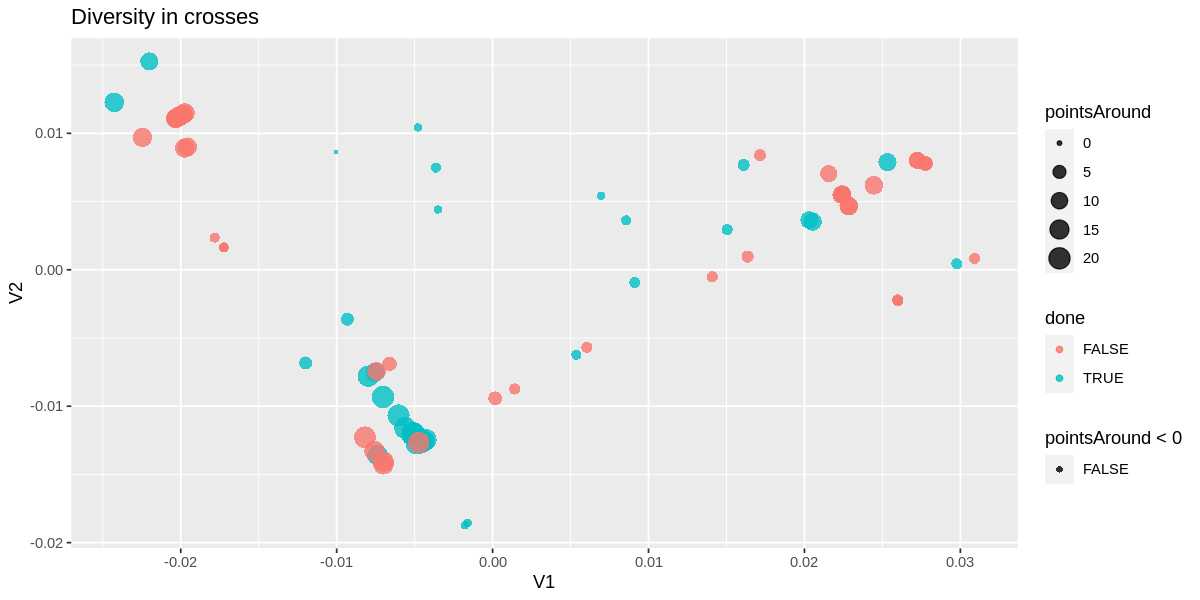

In [103]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(already_crossed_and_definitely_planned_and_potential, aes(V1,V2,color=done,size=pointsAround,shape=pointsAround<0))+
geom_point(alpha=0.8)+ggtitle("Diversity in crosses")

In [105]:
all_comparisons_unique

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow,unique
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>
810,ABS,ACN,0.021347,Cocoa beans,NA,Red Blauer Portugieser grapes,Austria,574,723,TRUE
1027,AAM,AKH,0.047275,Bakery,France,Palm wine,Nigeria,18,895,TRUE
1773,ABC,BAK,0.043183,Ascites fluid,USA,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",297,1596,TRUE
1829,ABA,BAN,0.041188,"Human, clinical","California, USA",Rotten wood,"Wuzhi Mountain, Hainan province, China",241,1652,TRUE
2077,AMM,BEF,0.036493,Leaf of Trema orientalis,"Beinan, Taitung, Taiwan",Fermenting rice,China,1248,1855,TRUE
3194,AAR,CPG,0.023207,Beer,Ireland,"Manzanilla-Alorena, olive","Aceituna, Spain",96,2679,TRUE


In [106]:
crossThese=already_crossed_and_definitely_planned_and_potential[order(already_crossed_and_definitely_planned_and_potential$pointsAround),]
crossThese=subset(crossThese, done==FALSE)
(crossThese)

,s1,s2,done,x.x,y.x,x.y,y.y,V1,V2,pointsAround
,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74,ABG,CPG,FALSE,0.0056146297,-0.0005247864,-0.016059430,-0.0028172500,-0.0178270520,0.0023566596,2
77,AKI,CPG,FALSE,0.0061513635,0.0019686178,-0.016059430,-0.0028172500,-0.0172404882,0.0016412953,2
79,ATE,CPG,FALSE,0.0061509456,0.0019791240,-0.016059430,-0.0028172500,-0.0172394373,0.0016405138,2
39,AAR,AKH,FALSE,0.0244536276,0.0067450445,-0.005992000,-0.0028719938,0.0014177096,-0.0087356592,3
42,AKH,AKQ,FALSE,0.0244536276,0.0067450445,-0.000971491,0.0013526756,0.0060422086,-0.0056899716,3
43,AKH,AKS,FALSE,0.0244536276,0.0067450445,0.008667266,0.0015489838,0.0140876504,-0.0005104027,3
49,ACK,BAK,FALSE,0.0323886674,0.0064408251,0.018582167,-0.0035517323,0.0259757518,-0.0022094467,3
55,AKH,BEF,FALSE,0.0324528888,0.0067450445,0.024453628,-0.0037318876,0.0309159899,0.0008341772,3
56,BAK,BEF,FALSE,0.0324528888,0.0064408251,0.018582167,-0.0037318876,0.0259908399,-0.0022781631,3


In [24]:
# Ecology

summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`),n=n())
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Ecological origin`),n=n())

Geographical Origin,n
<chr>,<int>
Austria,1
"Beinan, Taitung, Taiwan",1
"Brittany, France",2
"California, USA",1
China,1
"Cognac, France",1
"Dolianova, Sardinia, Italy",1
"Dongling Mountain, Beijing, china",1
"Dongpu, Sinyi Township, Nantou, Taiwan",1


Ecological origin,n
<chr>,<int>
Ascites fluid,1
Baker's yeast,1
Bakery,1
Banana wine,1
"Bark, Quercus wutaishanica",1
Beer,1
Beetle,1
Bili wine,1
"Cider brewery, industrial raw juice",2


In [25]:
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`, `Ecological origin`),n=n())


`summarise()` has grouped output by 'Geographical Origin'. You can override using the `.groups` argument.



Geographical Origin,Ecological origin,n
<chr>,<chr>,<int>
Austria,Red Blauer Portugieser grapes,1
"Beinan, Taitung, Taiwan",Leaf of Trema orientalis,1
"Brittany, France","Cider brewery, industrial raw juice",2
"California, USA","Human, clinical",1
China,Fermenting rice,1
"Cognac, France",Cognac,1
"Dolianova, Sardinia, Italy",Grape must,1
"Dongling Mountain, Beijing, china","Bark, Quercus wutaishanica",1
"Dongpu, Sinyi Township, Nantou, Taiwan",Fruiting body of Geastrum sp.,1


# Would the best case so far be filtered out?

In [26]:
"BAH" %in% SV_filter # not tested
"BAH" %in% Matrix_filter
"BAH" %in% polyploidy_filter

"CGD" %in% SV_filter # filtered out
"CGD" %in% Matrix_filter
"CGD" %in% polyploidy_filter

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE